<a href="https://colab.research.google.com/github/Jlok17/2022MSDS/blob/main/Data_622_Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data 622 Homework 1

Exploratory analysis

* Review the structure and content of the tables, and think about the data sets (structure, size, dependencies, labels, etc)
* Consider the similarities and differences in the two data sets you have downloaded
* Think about how to analyze and predict an outcome based on the datasets available
* Based on the data you have, think which two machine learning algorithms presented so far could be used to analyze the data


#### Deliverable


Essay (minimum 500 word document)

> Write a short essay explaining your selection of algorithms and how they relate to the data and what you are trying to do
Exploratory Analysis using R or Python (submit code + errors + analysis as notebook or copy/paste to document)
Explore how to analyze and predict an outcome based on the data available. This will be an exploratory exercise, so feel free to show errors and warnings that raise during the analysis. Test the code with both datasets selected and compare the results.



#### Answer questions such as:
*  Are the columns of your data correlated?
* Are there labels in your data? Did that impact your choice of algorithm?
* What are the pros and cons of each algorithm you selected?
* How your choice of algorithm relates to the datasets (was your choice of algorithm impacted by the datasets you chose)?
* Which result will you trust if you need to make a business decision?
* Do you think an analysis could be prone to errors when using too much data, or when using the least amount possible?
* How does the analysis between data sets compare?


#### Libraries Used:

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

### Data Source 1

For the first data source, I will be using a data source from Kaggle as linked below. A brief introduction to this data set is that it has collected the different credit card transactions made in india which the hope to take a look at spending habits in all parts of india. The data set is formatted by having  26,052 rows of data with 7 columns.

The 7 columns being:


*   Index: The Unique Entry Number
*   City: The city where the transaction had taken place
*   Date: The Date of the Transaction
*   Card Type: the Type of credit card that was used
*   Exp Type: The type of expense associated with the transaction
*   Gender: The Gender of the individual
*   Amount: The amount of the transaction


With the Original Data Set, I am also going to add another dataframe for the exploratory analysis as I think the original data set could use more infomation such as the State, Zone, Median Income per Capita in City. I believe that add this infomation will allow us to have a more accuracte predictive model, which I will be exploring the prediction of Card Type based on the rest of the dataframe.

My methodology for creating the 2nd dataframe with the Indian City/Income table was to just compile them into a google sheet together and classify them or group them by index match. Utilizing this, seen below we can see there will be a classified over 10000 rows that have this infomation.

[Data Source 1](https://www.kaggle.com/datasets/ayushchandramaurya/credit-card-spendings)

[India State Income](https://en.wikipedia.org/wiki/List_of_Indian_states_and_union_territories_by_GDP_per_capita)

[India City to State](https://www.krisia.com/city_list.htm)

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/Credit%20card%20transactions%20-%20India%20-%20Simple.csv", sep = ",")
India_State_Income = pd.read_csv("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/India%20State_Income_City%20-%20Sheet1%20(1).csv", sep =",")

In [3]:
# Sample of Data Set
df1.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
# Data Information:
print(df1.info())
print("")
print("Unique Number of Cities:",df1['City'].nunique())
print("Unique Expense Type:",df1['Exp Type'].unique())
print("Unique Card Type:", df1['Card Type'].unique())
print("Unique Gender:", df1['Gender'].unique())
print("Amount Ranges from a Maximum of", df1['Amount'].max(),"to a Minimum:",df1['Amount'].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB
None

Unique Number of Cities: 986
Unique Expense Type: ['Bills' 'Food' 'Entertainment' 'Grocery' 'Fuel' 'Travel']
Unique Card Type: ['Gold' 'Platinum' 'Silver' 'Signature']
Unique Gender: ['F' 'M']
Amount Ranges from a Maximum of 998077 to a Minimum: 1005


In [5]:
df1.corr()

<ipython-input-5-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,index,Amount
index,1.000000,-0.106806
Amount,-0.106806,1.000000


In [6]:
city_num = df1['City'].value_counts()
city_num_df = pd.DataFrame({'City': city_num.index, 'Frequency': city_num.values})
print(city_num_df)

                       City  Frequency
0          Bengaluru, India       3552
1     Greater Mumbai, India       3493
2          Ahmedabad, India       3491
3              Delhi, India       3482
4          Hyderabad, India        784
..                      ...        ...
981         Rayagada, India          1
982         Varanasi, India          1
983  Hugli-Chinsurah, India          1
984        Alirajpur, India          1
985          Fazilka, India          1

[986 rows x 2 columns]


In [7]:
## Finding all the cities that has less than 10 Counts
city_num_under_10 = city_num_df[city_num_df['Frequency'] < 10]
print(city_num_under_10)

                       City  Frequency
118        Rishikesh, India          9
119        Sholingur, India          9
120        Revelganj, India          9
121            Khair, India          9
122           Batala, India          9
..                      ...        ...
981         Rayagada, India          1
982         Varanasi, India          1
983  Hugli-Chinsurah, India          1
984        Alirajpur, India          1
985          Fazilka, India          1

[868 rows x 2 columns]


In [8]:
# Filter the original DataFrame to include only cities with a count greater than or equal to 10
df1_filtered = df1[df1['City'].isin(city_num_df[city_num_df['Frequency'] >= 10]['City'])]

# Display the filtered DataFrame
print(df1_filtered)


       index                   City       Date  Card Type Exp Type Gender  \
0          0           Delhi, India  29-Oct-14       Gold    Bills      F   
1          1  Greater Mumbai, India  22-Aug-14   Platinum    Bills      F   
2          2       Bengaluru, India  27-Aug-14     Silver    Bills      F   
3          3  Greater Mumbai, India  12-Apr-14  Signature    Bills      F   
4          4       Bengaluru, India   5-May-15       Gold    Bills      F   
...      ...                    ...        ...        ...      ...    ...   
26047  26047         Kolkata, India  22-Jun-14     Silver   Travel      F   
26048  26048            Pune, India   3-Aug-14  Signature   Travel      M   
26049  26049       Hyderabad, India  16-Jan-15     Silver   Travel      M   
26050  26050          Kanpur, India  14-Sep-14     Silver   Travel      M   
26051  26051       Hyderabad, India  19-Oct-13  Signature    Bills      M   

       Amount  
0       82475  
1       32555  
2      101738  
3      1234

In [9]:
df1_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21308 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      21308 non-null  int64 
 1   City       21308 non-null  object
 2   Date       21308 non-null  object
 3   Card Type  21308 non-null  object
 4   Exp Type   21308 non-null  object
 5   Gender     21308 non-null  object
 6   Amount     21308 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.3+ MB


In [10]:
India_State_Income.head(10)

,City,State,Region,Income
0,Agartala,Tripura,North East India,"1,617.00"
1,Agra,Uttar Pradesh,North India,832.00
2,Ahmedabad,Gujarat,West India,"2,872.00"
3,Aizwal,Mizoram,East India,"1,949.00"
4,Ajmer,Rajasthan,West India,"1,565.00"
5,Bengaluru,Karnataka,South India,"3,191.00"
6,Allahabad,Uttar Pradesh,North India,832.00
7,Alleppey,Kerala,South India,"2,767.00"
8,Alibaug,Maharashtra,West India,"2,606.00"
9,Almora,Uttaranchal,North India,"2,603.33"


In [11]:
# Creating a Copy
df1_copy = df1_filtered.copy()

# Taking out ",India" from City
df1_copy.loc[:, 'City'] = df1_copy['City'].str.split(',').str[0].str.strip()

# Merge Dataframe
df1_merged = pd.merge(df1_copy, India_State_Income[['City', 'State', 'Region', 'Income']], on='City', how='left')
df1_merged.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,State,Region,Income
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475,Delhi,North India,"4,644.00"
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555,Maharashtra,West India,"2,606.00"
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738,Karnataka,South India,"3,191.00"
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424,Maharashtra,West India,"2,606.00"
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574,Karnataka,South India,"3,191.00"


In [12]:
df1_merged.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,State,Region,Income
0,0,Delhi,29-Oct-14,Gold,Bills,F,82475,Delhi,North India,"4,644.00"
1,1,Greater Mumbai,22-Aug-14,Platinum,Bills,F,32555,Maharashtra,West India,"2,606.00"
2,2,Bengaluru,27-Aug-14,Silver,Bills,F,101738,Karnataka,South India,"3,191.00"
3,3,Greater Mumbai,12-Apr-14,Signature,Bills,F,123424,Maharashtra,West India,"2,606.00"
4,4,Bengaluru,5-May-15,Gold,Bills,F,171574,Karnataka,South India,"3,191.00"


In [13]:
# Data Manipulation for KNN
card_class_mapping = {'Silver': 1, 'Gold': 2, 'Platinum': 3, 'Signature': 4}
df1_merged['Card_Class'] = df1_merged['Card Type'].map(card_class_mapping)
df1_merged = pd.get_dummies(df1_merged, columns=['Gender', 'Exp Type', 'State', 'Region'])
df1_merged.drop(columns=['City', 'index', 'Card Type'], inplace=True)
df1_merged['Date'] = pd.to_datetime(df1_merged['Date'])
df1_merged['Month'] = df1_merged['Date'].dt.month
df1_merged['DayOfWeek'] = df1_merged['Date'].dt.dayofweek
df1_merged['Income'] = df1_merged['Income'].str.replace(',', '').astype(float)

# Getting Rid of NAs
df1_merged.dropna(inplace=True)

In [14]:
#### Check for missing values in X
#missing_values = X.isna().sum()
#print("Missing values in X:\n", missing_values)
# Filter rows with missing values
#rows_with_missing_values = X[X.isna().any(axis=1)]
#print("Rows with missing values:\n", rows_with_missing_values)

In [15]:
# Split Dataset into Features (X) and Target Variable (Y)
X = df1_merged.drop(columns=['Card_Class','Date'])
y = df1_merged['Card_Class']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled, y_train)

# Model evaluation
y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



              precision    recall  f1-score   support

           1       0.26      0.47      0.33      1044
           2       0.26      0.30      0.28      1040
           3       0.23      0.17      0.20       964
           4       0.24      0.06      0.09      1003

    accuracy                           0.25      4051
   macro avg       0.25      0.25      0.23      4051
weighted avg       0.25      0.25      0.23      4051

[[489 315 174  66]
 [474 314 189  63]
 [468 275 166  55]
 [465 297 182  59]]


In [16]:
# Correlation Matrix
correlation_matrix = X.corr()
print(correlation_matrix)

                          Amount    Income  Gender_F  Gender_M  \
Amount                  1.000000  0.025274  0.061074 -0.061074   
Income                  0.025274  1.000000  0.026765 -0.026765   
Gender_F                0.061074  0.026765  1.000000 -1.000000   
Gender_M               -0.061074 -0.026765 -1.000000  1.000000   
Exp Type_Bills          0.131003  0.021432  0.045210 -0.045210   
Exp Type_Entertainment -0.022312 -0.005942 -0.026384  0.026384   
Exp Type_Food          -0.032370  0.032976  0.034181 -0.034181   
Exp Type_Fuel          -0.037490  0.040115 -0.035876  0.035876   
Exp Type_Grocery       -0.029994 -0.003208 -0.015233  0.015233   
Exp Type_Travel        -0.018442 -0.184564 -0.007642  0.007642   
State_Andhra Pradesh   -0.022782 -0.102416 -0.014875  0.014875   
State_Delhi             0.007350  0.783570  0.017456 -0.017456   
State_Gujarat           0.012400 -0.015263 -0.002052  0.002052   
State_Haryana           0.001145  0.006706 -0.009752  0.009752   
State_Jamm

In [17]:
# Getting all Correlation that has a value greater than 0.25 or less than -0.25.
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] < -0.25 or correlation_matrix.iloc[i, j] > 0.25:
            print(f"Correlation between {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]}")

Correlation between Income and State_Delhi: 0.7835700583072597
Correlation between Income and State_Rajasthan: -0.2655589805304463
Correlation between Income and State_Uttar Pradesh: -0.5888832080152934
Correlation between Income and Region_East India: -0.4710595252426452
Correlation between Income and Region_North India: 0.5270109337060094
Correlation between Gender_F and Gender_M: -1.0000000000000007
Correlation between Exp Type_Bills and Exp Type_Food: -0.25288237781336675
Correlation between Exp Type_Food and Exp Type_Fuel: -0.2614496067970241
Correlation between State_Andhra Pradesh and Region_South India: 0.3454472342045218
Correlation between State_Delhi and Region_North India: 0.8771331030484322
Correlation between State_Delhi and Region_South India: -0.2646911329282479
Correlation between State_Delhi and Region_West India: -0.41953134617349847
Correlation between State_Gujarat and State_Maharashtra: -0.2657333848329425
Correlation between State_Gujarat and Region_North India: 

#### Summary of Data Source 1:

As seen above there was the original dataframe without any conversion there wasn't any real correlation between the different columns since only 2 out of the 7 columns were in float form. The rest of the 5 columns were all strings so there wasn't any correlation to happen between them. There are labels such as Card Type, Exp Type, and Gender within the data set and this allowed me the opportunity to want to create a supervised machine learning for classification of Card Type.



With the different classes being Silver, Gold, Platinum, and Signature. I decided to go with a KNN Classifer due to the simplicity of the data, as including the GDP/Capita and the Cities/State/Zone, I believed would create enough features for it. Looking at this data and result, I can interpret that the features were working too well together as certain locations are fixed and have caused a very strong correlation between State and Region. The only correlation that was useful through this algorithm was Income and State/Region but it was not enough to create a strong prediction model. Finally it should be noted that the data that were taken out, such as any Cities that appeared less than 10 times in the data set(895 cities). And subsequently any row that had NAs in Income after the data cleaning were taken out, which ended up being 1055 NAs.


### Data Source 2:

For the second data source, I will be using another data source from Kaggle as linked below. An introduction of this data set is that it is the 2020 Annual CDC survey data that contains over 250,000 adults and their health status. The CDC wanted to survey different individuals in order to determine any lifestyle and figure out any prevention of very common factors relating to heart disease. This data set has 319,795 rows of data with 18 columns and we will use a different supervised learning method called XGBoost to predict risk of Heart Disease.

The 18 columns being:

*  HeartDisease: Do They Have Heart Disease?
*  BMI: BMI of the Individual
*  Smoking: Does the Individual Smoke?
*  AlcoholDrinking: Does the Individual Drink Alcohol?
*  Stroke: Does the Individual have a history with Strokes?
*  PhysicalHealth: For how many days during the past 30 days was your physical health not good?
*  MentalHealth: For how many days during the past 30 days was your mental health not good?
*  DiffWalking: Does the Individual have difficulty Walking?
*  Sex: What is the gender of the Individual?
*  AgeCategory: What Age Range is the Individual in?
*  Race: What is the Ethnicity of the Individual?
*  Diabetic: Is the Individual Diabetic/If So were they Pregnant?
*  PhysicalActivity: Does the Individual engage in Physical Activities?
*  GenHealth: What is the General Health of the Individual?
*  SleepTime: How much Sleep does the Individual get?
*  Asthma: Does the Individual have a history with Asthma?
*  KidneyDisease: Does the Individual have a history with Kidney Disease?
*  SkinCancer: Does the Individual have a history with Skin Cancer?


Since this Data Set is very clean and has multiple different features, I will be just using this data set by itself and not adding other features like the first data source I used. I should note even though there are statistical difference in the ethnicity of individuals and their health risks, I have decided to just remove that feature from the prediction as I don't know how to create a class with the ethnicities themselves as well as to account for the "Other" value in that column.

[Data Source 2](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/data)


In [18]:
df2 = pd.read_csv("https://raw.githubusercontent.com/Jlok17/2022MSDS/main/Source/heart_2020_cleaned.csv", sep =",")

In [19]:
# Data Preview
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [20]:
# Data Set Info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [21]:
# Column Names and Unique Values
for i in df2.columns:
  print(i)
  print(df2[i].unique())
  print("")

HeartDisease
['No' 'Yes']

BMI
[16.6  20.34 26.58 ... 62.42 51.46 46.56]

Smoking
['Yes' 'No']

AlcoholDrinking
['No' 'Yes']

Stroke
['No' 'Yes']

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]

DiffWalking
['No' 'Yes']

Sex
['Female' 'Male']

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']

PhysicalActivity
['Yes' 'No']

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]

Asthma
['Yes' 'No']

KidneyDisease
[

In [22]:
# Creating a Copy for Manipulation
df3 = df2.copy()
df3.drop(columns=['Race'], inplace=True)

In [23]:
# Define mappings for categorical variables
encoding_mapping = {
    'Yes': 1, 'No': 0,
    'Very good': 5, 'Excellent': 4, 'Good': 3, 'Fair': 2, 'Poor': 1,
    'Female': 0, 'Male': 1
}

encoding_mapping_2 = {
     'Yes': 3, 'No': 0,'No, borderline diabetes': 1, 'Yes (during pregnancy)': 2,
}

# Apply mappings to the DataFrame columns
df3['Smoking'] = df3['Smoking'].map(encoding_mapping)
df3['AlcoholDrinking'] = df3['AlcoholDrinking'].map(encoding_mapping)
df3['Stroke'] = df3['Stroke'].map(encoding_mapping)
df3['DiffWalking'] = df3['DiffWalking'].map(encoding_mapping)
df3['PhysicalActivity'] = df3['PhysicalActivity'].map(encoding_mapping)
df3['Asthma'] = df3['Asthma'].map(encoding_mapping)
df3['KidneyDisease'] = df3['KidneyDisease'].map(encoding_mapping)
df3['SkinCancer'] = df3['SkinCancer'].map(encoding_mapping)
df3['GenHealth'] = df3['GenHealth'].map(encoding_mapping)
df3['HeartDisease'] = df3['HeartDisease'].map(encoding_mapping)
df3['Sex'] = df3['Sex'].map(encoding_mapping)

df3['Diabetic'] = df3['Diabetic'].map(encoding_mapping_2)

In [24]:
# Converting 'AgeCategory' into Dummy Variables
age_dummies = pd.get_dummies(df3['AgeCategory'], prefix='Age')

df3 = pd.concat([df3, age_dummies], axis=1)
df3.drop(columns=['AgeCategory'], inplace=True)

In [25]:
df3.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,Age_35-39,Age_40-44,Age_45-49,Age_50-54,Age_55-59,Age_60-64,Age_65-69,Age_70-74,Age_75-79,Age_80 or older
0,0,16.60,1,0,0,3.0,30.0,0,0,3,...,0,0,0,0,1,0,0,0,0,0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,3,...,0,0,0,0,0,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


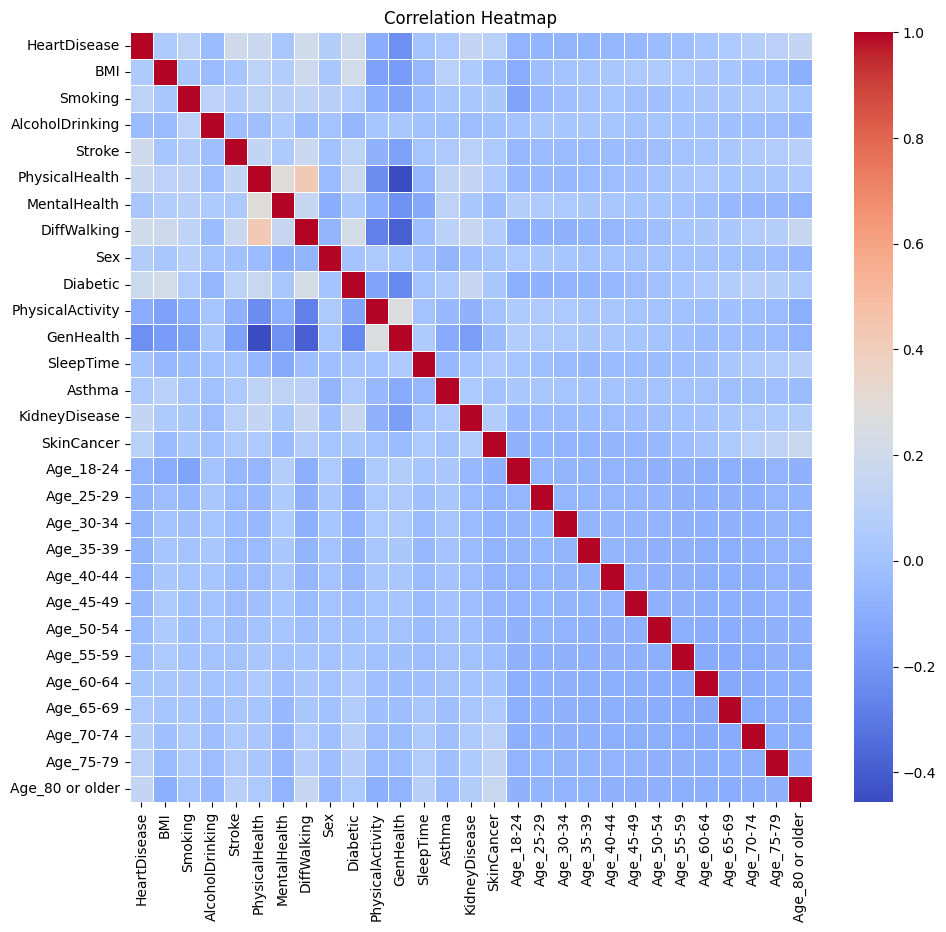

In [26]:
# Correlation Matrix
corr_matrix = df3.corr()

# Correlation Heatmap
plt.figure(figsize=(11, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Split Train/Test Daa
X = df3.drop("HeartDisease", axis = 1)
y = df3["HeartDisease"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 334)

In [28]:
# Verifying Shape of Test/Train Sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(239846, 28) (79949, 28) (239846,) (79949,)


In [29]:
# XGBoost Model
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
# Prediction
preds = xgb_cl.predict(x_test)

In [31]:
# Results of Prediction
print(classification_report(y_test, preds))
print("")
print(confusion_matrix(y_test, preds))
print("")
print("Model Accuracy for Test Dataset:", accuracy_score(y_test, preds))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     73140
           1       0.50      0.10      0.16      6809

    accuracy                           0.91     79949
   macro avg       0.71      0.54      0.56     79949
weighted avg       0.89      0.91      0.89     79949


[[72488   652]
 [ 6161   648]]

Model Accuracy for Test Dataset: 0.9147831742735995


#### Summary of Data Source 2:

First thing, when examining the data set for the values of each column. Something that was apparent was that a lot of the columns have a unique value of Yes or No. As well as different levels of health and Gender being Male and Female. To combat this and to make the entire data set become boolean or float values. I decided to turn Yes/No and Male/Female Columns into 0 or 1 values and for the different levels of health. I created different levels for each health status for example, GenHealth has 5 different unique values such as 'Very good','Fair','Good','Poor', and 'Excellent'. I then made them into values from 1 to 5 with 5 being the best status of health or 'Excellent'. After converting the data into a numeric type, I did a correlation matrix of the dataset and we can see much more correlation in this data set as the features are more independent from each other. Finally after the data was all cleaned and manipulated, I decided to use XGBoost to predict whether or not they had heart disease and did a 25/75 test/train split. We can see from the result of the prediction to the Y Test that we get a model accuracy of 91.48%. However as we will continue later we can see that the model accuracy number is a bit misleading.

### Essay:


The 2 Data Sources I had picked were both from Kaggle, the smaller data set with about 25,000 rows was about the different spending habits in all parts of india. It focused on the transaction amount as well as credit/expense types with the location and time also being included in that data set. I felt that this data set was lacking in features and variables as adding different metrics such as region of the cities, since there were way too many cities. As well as the Income per Capita in those regions would be added to help predict the type of card that was being used. As seen from the messy data, a lot of dummy values for the location, Exp Type, and gender were created in order to convert the data from strings to numeric for a prediction model. Due to the rather simplicity of the data from my opinion, I had decided to go with the KNN or K-Nearest Neighbors algorithm for the prediction. As we see the results, it was pretty bad with all the classes didn't have a higher than 26% precision rate and the recall and f-1 score were good for class 1 and periodically got worse going to class 4. As explored with the correlation matrix of the manipulated data, we saw that many of the features were redundant as they were fixed correlated by location. As the only notable ones were coming from Income and different Regions but doesn't really show any promise. The advantages of KNN was that since it operates based on similarity, it would be able to classify the testing/prediction point based on the majority. This is both positive and negative as it doesn't require any training so it is very simplistic with RSME being its classifier of which class, it doesn't have the scalability for a larger data set. With 25,000 rows, I wonder if that sample size is way too much for the KNN algorithm especially with the useless features that were apart of the data set.



---




The next data set that I had used was from the 2020 Annual CDC survey for over 250,000 adults and their health status. In order to determine different factors for heart disease. Similarly to the other data set, I had a lot of columns being in strings, however the unique values for those columns were commonly "Yes"/"No". This makes it easier since we are able to changes those string values into boolean 0/1. The other columns were progressive levels and were changes accordingly to a 1/2/3/4/5 level values in order to show different health status. After all the data was converted, I did another correlation matrix this time visualized by seaborn as the heatmap proves to be a better representation of the different correlation of variables. As a note the features in this data set seem to be a lot more independent therefore resulting in a better prediction model. I decided to go with XGBoost or Extreme Gradient Boosting, which is an algorithm mainly designed to handle larger data sets. That being one of the major reasons why I decided on this algorithm. XGBoost works by building upon the structures of decision treas and has different regularization techniques to prevent overfitting as well as handling missing data in general scenarios. This data set wasn't incomplete so those were not necessary but with around 320,000 rows I decided to go with this method. As we see the results and accuracy of the prediction, we see a model accuracy of 91.48%. However that number is misleading since only around 10% of the positive heart disease were actually classified by the prediction. This indicates that there is an imbalance of performance between the 2 classes and that there needs to be further model refinement in order to increase the prediction rate of class 1. The disadvantages with XGboost comes with overfitting and when there is an imbalance in data. Therefore tuning hyperparameters of the model should be done for future model refinement.


---


When comparing the 2 different prediction models that were used, we can for the most part indicate that the XGBoost had preformed way better. With the exception of the percision of predicting every class, was more consistent within the KNN model. The choice of which algorithm was used was mainly decided upon the simplicity/complexity of the variables/features, size of the data, and determining the interpretability of the model. I think in general since business decisions for prediction fall under more for accuracy rather than interpretability, XGBoost will be used more and has the results being able to be trusted. As seen from both models, there needs to be a balance in how much data is being used. With more data showcasing issues such as overfitting as well as using the least amount of data showing no discernable patterns. It needs to have the balance however I suggest leaning towards more data if its is accuracy related.